### **Commuting within a city from one place to another for working professionals or residents is a necessity who don't own a vehicle. Renting a bike can help these people to reach a desired place on time. Below dataset contains information of bike rental in a city for all seasons with all weather conditions.**

### **We have different seasons like summer, winter and different weather conditions like high humidity, dew point temperatures, whether it is a working day or holiday, all information when the bike was rented more and when it was least rented.**
---
### **Dataset Information**
* Number of instances: 8760
* Number of attributes: 14
---
### **Features information:**
### The dataset contains features like:
1. **Date** - Date on which bike was rented

2. **Rented_Bike_Count** - It shows the total number of count for which bike was rented

3. **Hour** - Duration of hours for which bike was rented

4. **Temperature** - Recorded temperature for the day

5. **Humidity** - Recorded humidity for the day

6. **Wind_Speed** - Wind speed recorded in m/s

7. **Visibility** - 10m visibility as it plays major role in winter season

8. **Dew_Point_Temperature** - Recorded dew point temperature

9. **Solar_Radiation** - Solar radiation for skin harm

10. **Rainfall** - Recorded rainfall for the day

11. **Snowfall** - If there was snowfall in the city

12. **Seasons** - Different seasons including winter and summer

13. **Holiday** - Whether bike was rented on holidays or not

14. **Functioning_Day** - Whether bike was rented on working days or not
---
### **Target Variable :**
* **Rented_Bike_Count** - This is the target variable for estimating total no. of bike rentals for differnet conditions.

# **Project Work flow**
---

1. **Importing Libraries**

2. **Loading the Dataset**

3. **Exploratory Data Analysis**

4. **Data Wrangling**

5. **Splitting the data and Standardization**

6. **Fitting models**

7. **Model Explainability**

8. **Conclusion**
--- 





In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# First we will load the data
df = pd.read_csv('SeoulBikeData - SeoulBikeData.csv')

In [4]:
# Lets look inside the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

**From the dataset we can see**

* **Number of records: 8760**
* **Number of features: 14**

In [6]:
print('The columns in the dataset are:\n', df.columns)

The columns in the dataset are:
 Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [10]:
df.value_counts('Date')

Date
2017-12-01    24
2018-08-09    24
2018-08-07    24
2018-08-06    24
2018-08-05    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: count, Length: 365, dtype: int64

In [11]:
df['weekdays']=df['Date'].dt.day_name()
df['days']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [12]:
df.drop('Date',axis=1,inplace=True)

In [13]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'weekdays', 'days', 'month', 'year'],
      dtype='object')

In [14]:
df.describe(include='all')

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,days,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760,8760.000000,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,7,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,Friday,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1272,NaN,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,NaN,23.000000,10.000000,2018.000000


In [15]:
# inspecting the null values
df.isnull().sum()

Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
weekdays                    0
days                        0
month                       0
year                        0
dtype: int64

**As we can see our dataset does not contain
any null values it means our dataset is clean**

In [16]:
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

In [17]:
cat_df

,Seasons,Holiday,Functioning Day,weekdays
0,Winter,No Holiday,Yes,Friday
1,Winter,No Holiday,Yes,Friday
2,Winter,No Holiday,Yes,Friday
3,Winter,No Holiday,Yes,Friday
4,Winter,No Holiday,Yes,Friday
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday
8756,Autumn,No Holiday,Yes,Friday
8757,Autumn,No Holiday,Yes,Friday
8758,Autumn,No Holiday,Yes,Friday


In [18]:
# converting categorical values into numerical values

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
le.fit_transform(cat_df['Seasons'])

array([3, 3, 3, ..., 0, 0, 0])

In [22]:
le.fit_transform(cat_df['Holiday'])

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
le.fit_transform(cat_df['Functioning Day'])

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
le.fit_transform(cat_df['weekdays'])

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
for col in cat_df:
    cat_df[col] = le.fit_transform(cat_df[col])

In [26]:
cat_df

,Seasons,Holiday,Functioning Day,weekdays
0,3,1,1,0
1,3,1,1,0
2,3,1,1,0
3,3,1,1,0
4,3,1,1,0
...,...,...,...,...
8755,0,1,1,0
8756,0,1,1,0
8757,0,1,1,0
8758,0,1,1,0


In [27]:
final_df=pd.concat([cat_df,num_df],axis=1)

In [28]:
from scipy.stats import skew

Rented Bike Count
1.1532306631480034


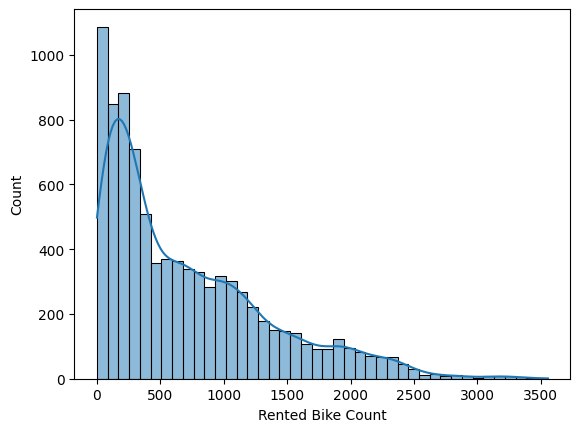

Hour
0.0


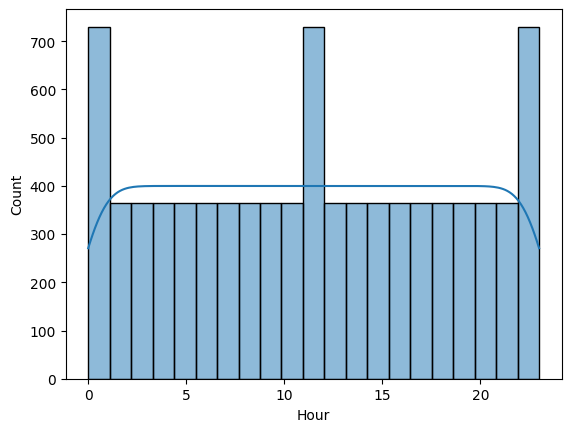

Temperature(蚓)
-0.19829157303281608


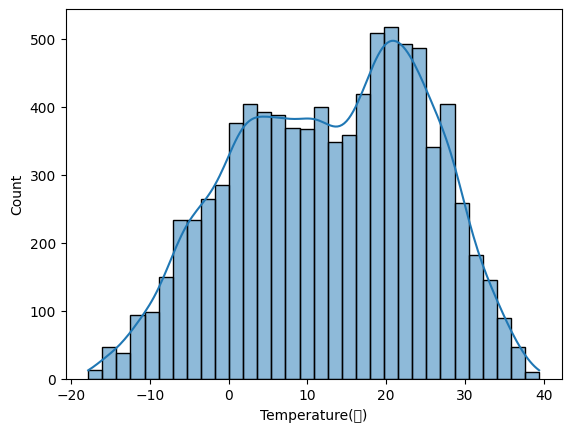

Humidity(%)
0.059568770212928474


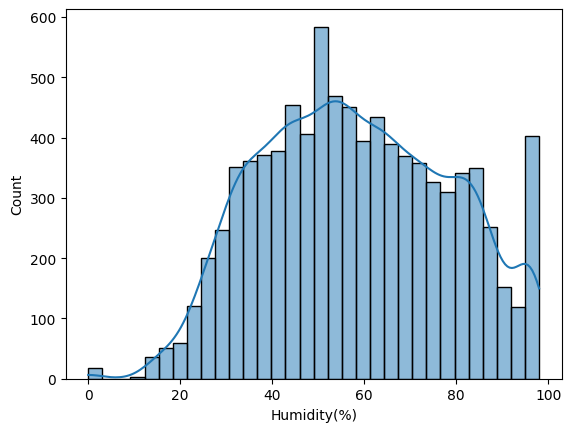

Wind speed (m/s)
0.8908022300197548


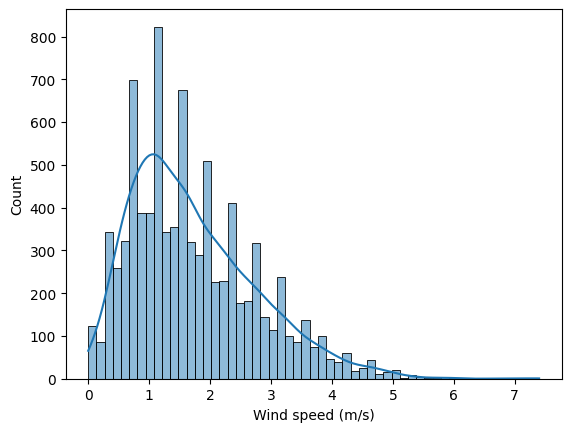

Visibility (10m)
-0.7016662743215496


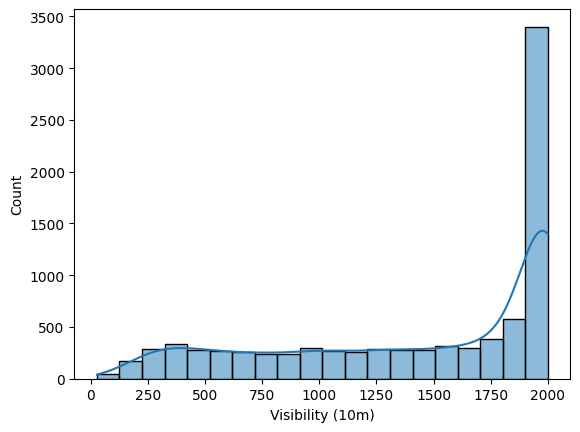

Dew point temperature(蚓)
-0.36723554310224116


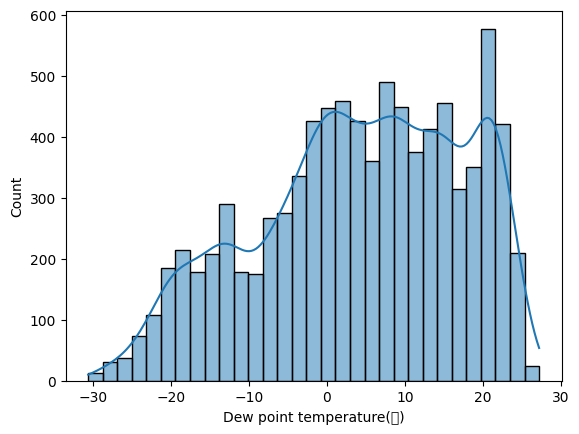

Solar Radiation (MJ/m2)
1.5037821640619484


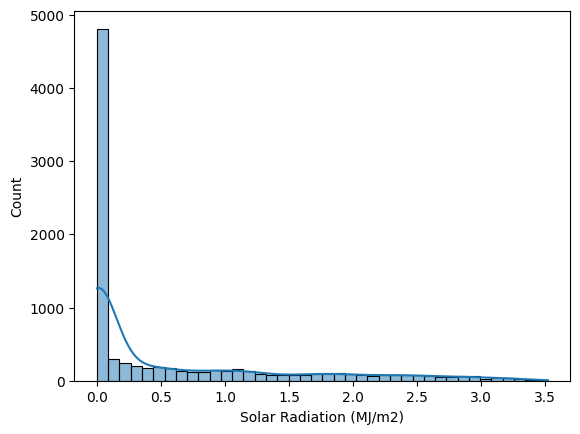

Rainfall(mm)
14.530743557004502


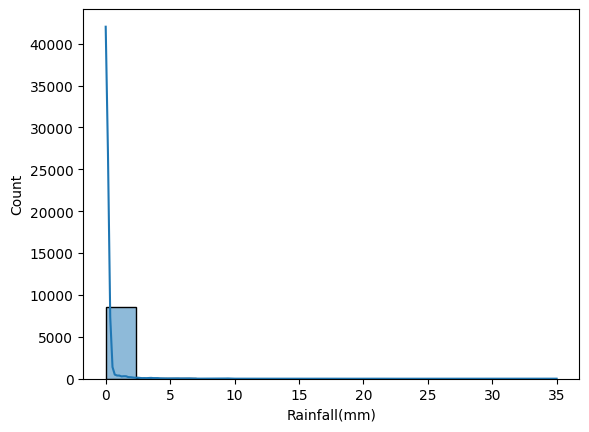

Snowfall (cm)
8.439355370132445


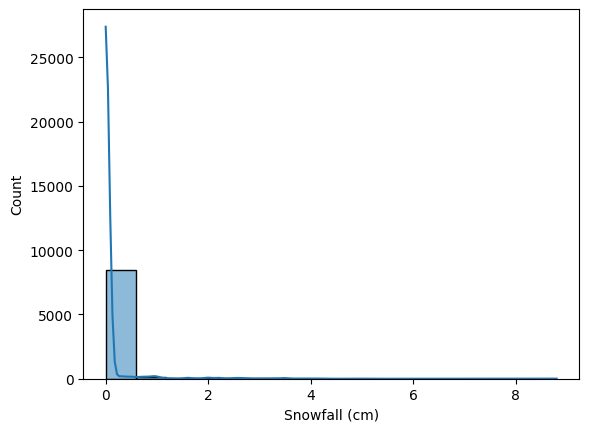

In [29]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

In [30]:
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [31]:
df.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


Text(0.5, 1.0, 'Heatmap')

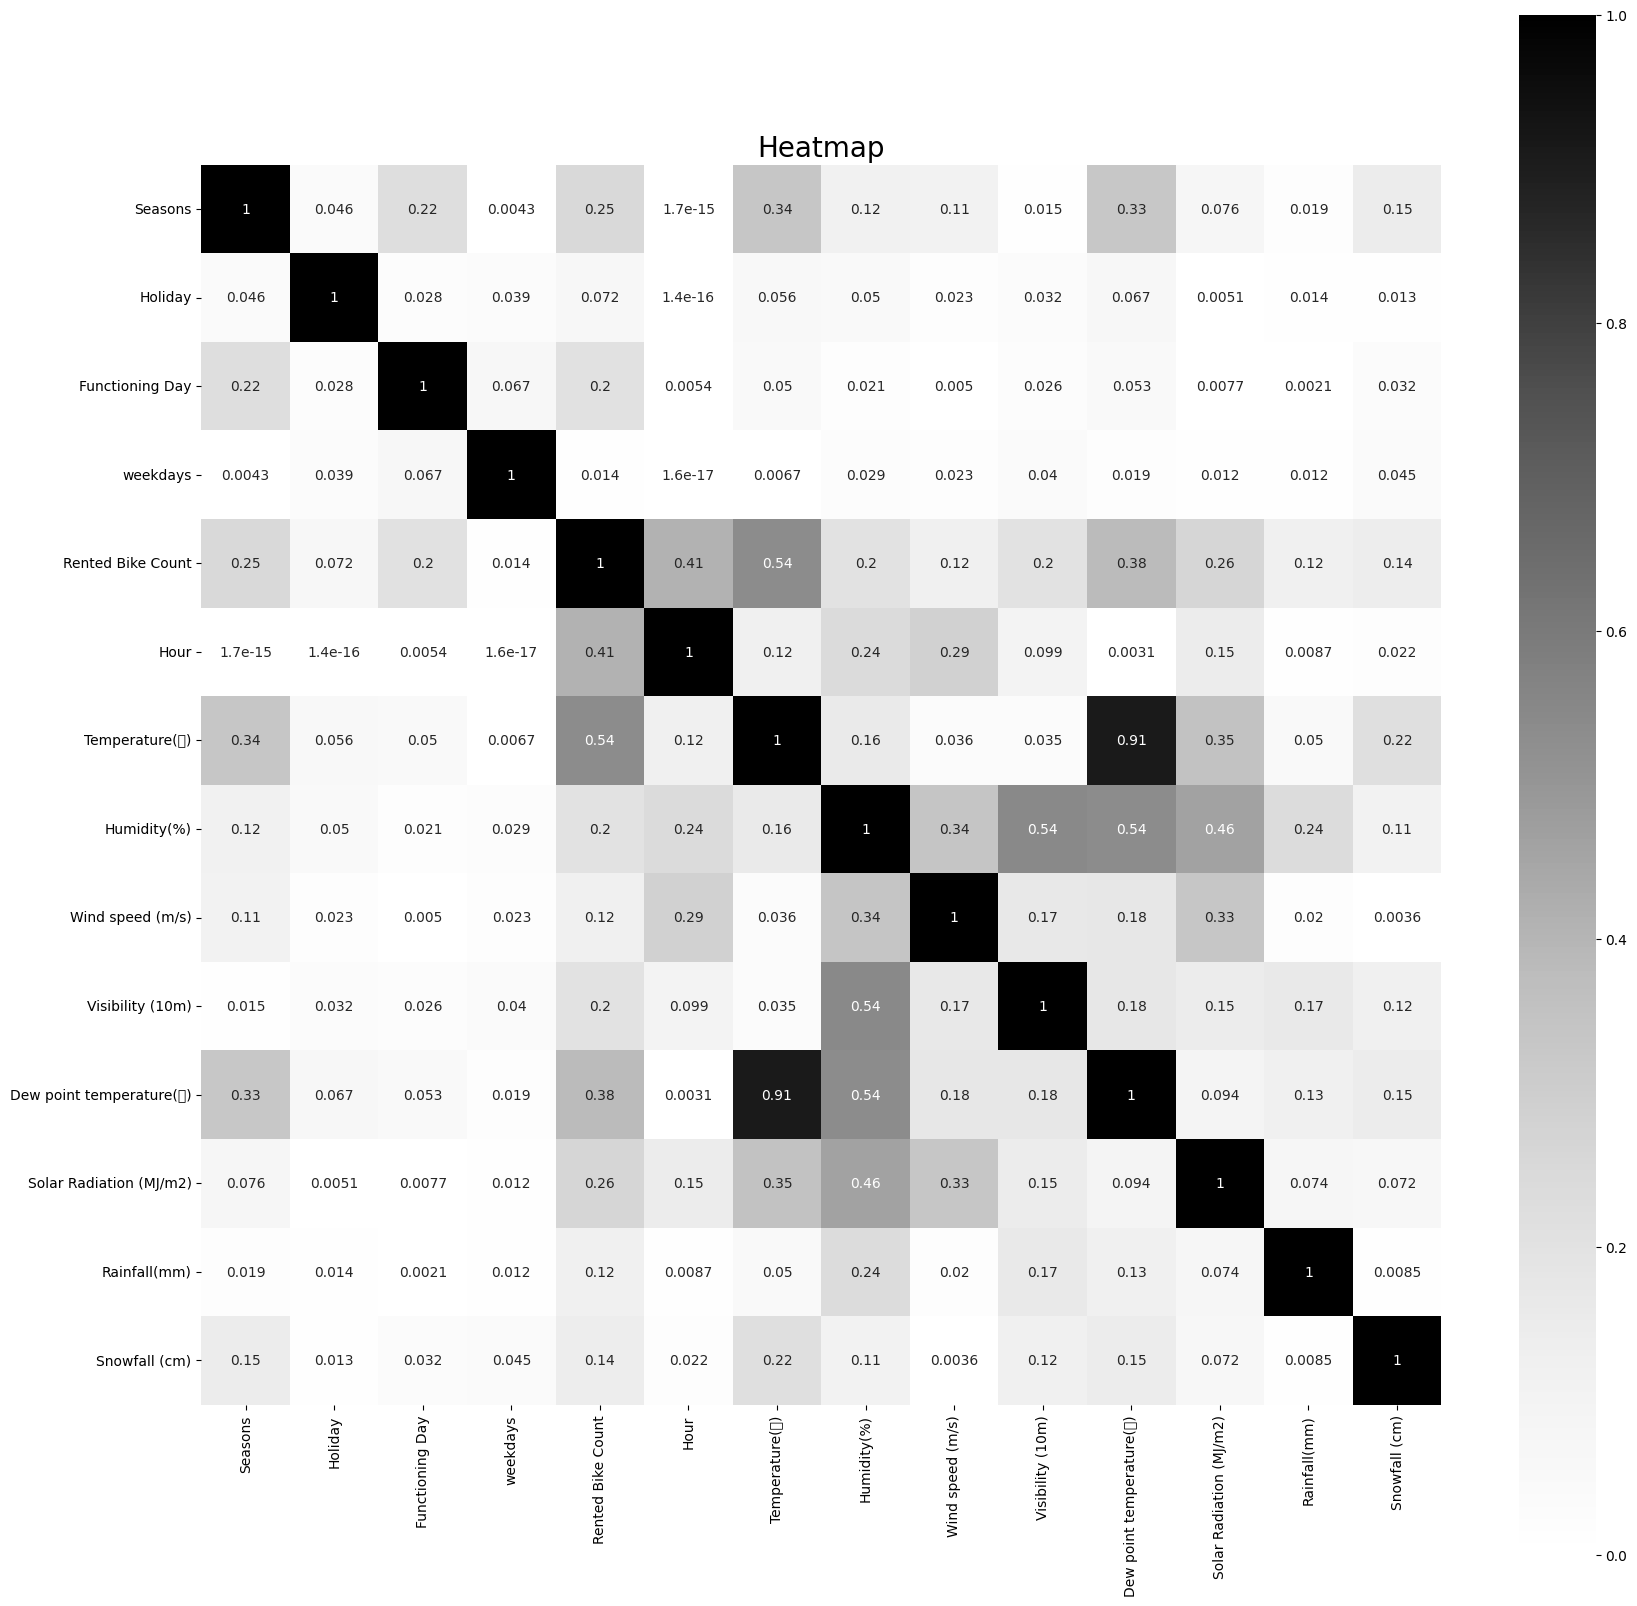

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(final_df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

In [33]:
final_df.skew()

Seasons                      0.004382
Holiday                     -4.163603
Functioning Day             -5.170969
weekdays                     0.003109
Rented Bike Count            1.153428
Hour                         0.000000
Temperature(蚓)              -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)             0.890955
Visibility (10m)            -0.701786
Dew point temperature(蚓)    -0.367298
Solar Radiation (MJ/m2)      1.504040
Rainfall(mm)                14.533232
Snowfall (cm)                8.440801
dtype: float64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

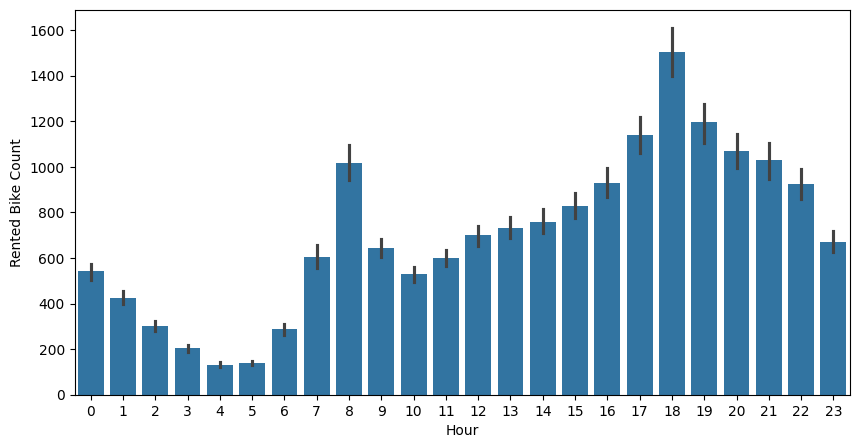

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

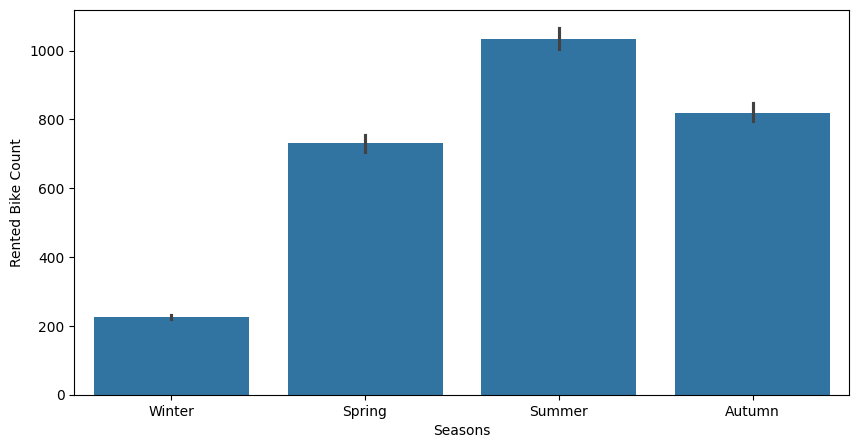

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

<Axes: xlabel='days', ylabel='Rented Bike Count'>

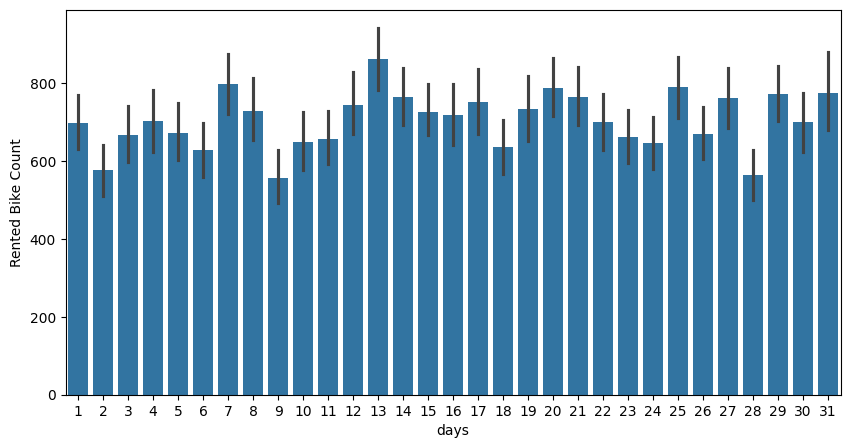

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='days',y='Rented Bike Count',data=df)

<Axes: xlabel='month', ylabel='Rented Bike Count'>

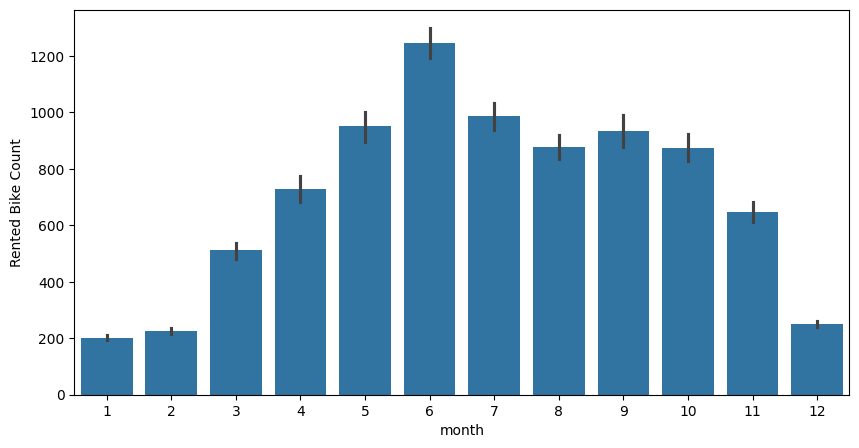

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='Rented Bike Count',data=df)

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

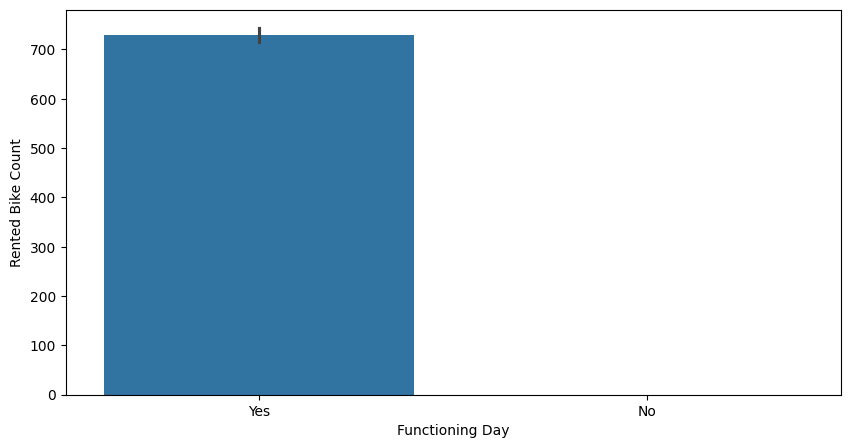

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

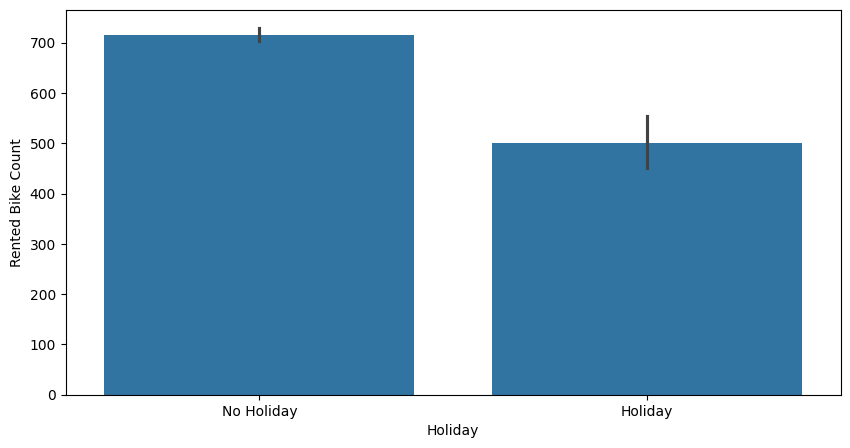

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

In [40]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [41]:
transformed_data = st.fit_transform(final_df)

In [42]:
new_df=pd.DataFrame(transformed_data ,columns=list(final_df.columns))

In [43]:
X = new_df.drop('Rented Bike Count', axis=1)
y = new_df['Rented Bike Count']

In [44]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.intercept_

-2.4665144984699237

In [49]:
regressor.coef_

array([-0.47415776,  0.20598535,  1.47495546,  0.02800107,  0.99923106,
        1.62773173, -1.58218741,  0.18652296,  0.06915302,  1.0330821 ,
       -0.43545719, -3.32346474,  0.42935365])

In [50]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 0.40902094, -0.06280404,  0.7527395 , ...,  0.69469295,
       -0.3983127 ,  1.15474865])

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.36260762,  0.63734543,  1.02120509, ...,  0.37765465,
       -1.30782198,  0.96249846])

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(y_test, y_pred)

0.46842284700611003

In [54]:
mean_squared_error(y_train, y_pred_train)

0.44643109619965066

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_train, y_pred_train)

0.5533883839482475

In [57]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

-1.6491004193319725e-06 0.0


In [58]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0)

In [59]:
lasso.fit(X_train,y_train)

Lasso(alpha=0)

In [60]:
lasso.coef_


array([-0.47415733,  0.20598531,  1.47495521,  0.02800109,  0.99923079,
        1.62780331, -1.58215476,  0.18652238,  0.06915355,  1.03300617,
       -0.43545932, -3.32347157,  0.42935175])

In [61]:
lasso.intercept_

-2.4665264117833274

In [62]:
y_pred1=lasso.predict(X_test)

In [63]:
y_pred1

array([ 0.36260709,  0.63734362,  1.02120462, ...,  0.37765435,
       -1.3078217 ,  0.96249793])

In [64]:
y_train_pred1 = lasso.predict(X_train)

In [65]:
print("R2 score on test dataset",r2_score(y_test,y_pred1))
print("R2 score on train dataset",r2_score(y_train,y_train_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score on test dataset 0.5323326184293322
R2 score on train dataset 0.5533883839456504
RMSE 0.6844142647939715


The test set's r2_score is 0.55. This means our linear model is not performing well on the data.

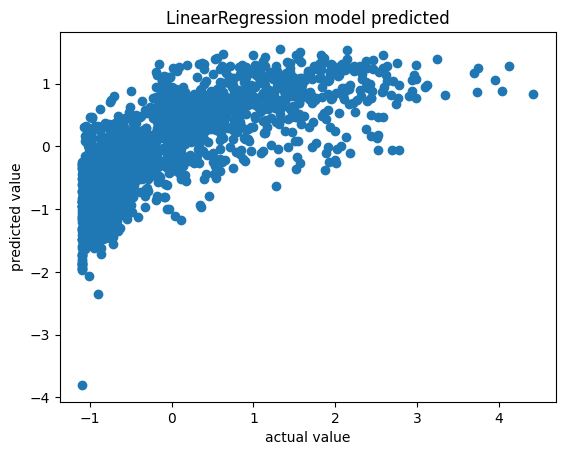

In [66]:
plt.scatter(y_test,y_pred)
plt.title("LinearRegression model predicted")
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [67]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [68]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [69]:
y_pred1=ridge.predict(X_test)

In [70]:
y_train_pred1 = ridge.predict(X_train)

In [71]:
mse = mean_squared_error(y_test, y_pred)
mse

0.46842284700611003

In [72]:
print("R2 score on test",r2_score(y_test,y_pred1))
print("R2 score on train",r2_score(y_train,y_train_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score on test 0.5324104545576455
R2 score on train 0.5533858327431931
RMSE 0.6843573072474299


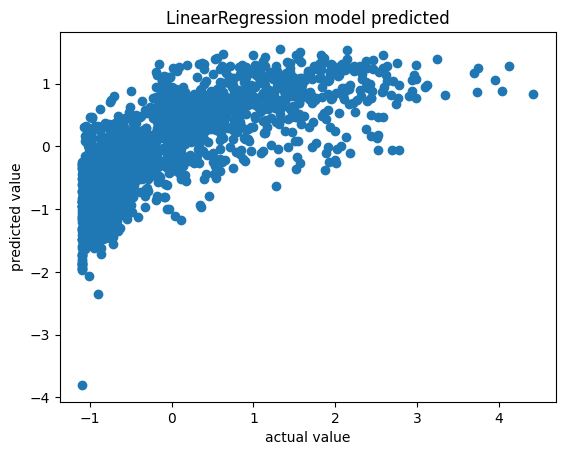

In [73]:
plt.scatter(y_test,y_pred)
plt.title("LinearRegression model predicted")
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 5, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [75]:
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [76]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [77]:
regressor.intercept_

-2.4665144984699237

In [78]:
regressor1.coef_

array([-3.86740391e+11, -5.63472392e+11, -5.42714122e+10, ...,
       -6.81893219e+07,  7.69003603e+07, -2.57890718e+08])

In [79]:
y_pred_train2 = regressor1.predict(X_train)

In [80]:
y_pred2 = regressor1.predict(X_test)

In [81]:
y_pred2

array([ 1.64129639,  0.1083374 , -0.15283203, ..., -0.65289307,
       -0.22021484, -0.35247803])

In [82]:
mse = mean_squared_error(y_test, y_pred2)
mse

6.6573724417422536e+16

In [83]:
print("R2 score on test",r2_score(y_test,y_pred2))
print("R2 score on train",r2_score(y_train,y_pred_train2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

R2 score on test -6.646634978770523e+16
R2 score on train 0.9427558840020059
RMSE 258018845.0819485


In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
reg = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=8, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=8, random_state=0)

In [86]:
y_predicted4 = reg.predict(X_test)

In [87]:
y_train_predicted4 = reg.predict(X_train)

In [88]:
print(mean_squared_error(y_test, y_predicted4))
print(r2_score(y_test, y_predicted4))

0.38463877800655427
0.6159815935698414


In [89]:
print(mean_squared_error(y_train, y_train_predicted4))
print(r2_score(y_train, y_train_predicted4))

0.34913494295167335
0.6507238800810371


In [90]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

gb_model = GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',
                                    max_depth=8,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)

ada_model = AdaBoostRegressor(n_estimators=50,learning_rate=0.1)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.05,
    n_estimators=100
)

gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
y_train_predicted5 = gb_model.predict(X_train)
y_train_predicted6 = ada_model.predict(X_train)
y_train_predicted7 = xgb_model.predict(X_train)

In [94]:
from sklearn import metrics

In [95]:
y_test_pred_gb = gb_model.predict(X_test)
y_train_pred_gb = gb_model.predict(X_train)
r2_score_test = round(metrics.r2_score(y_test, y_test_pred_gb),2)
r2_score_train = round(metrics.r2_score(y_train, y_train_pred_gb),2)

print(f'r2_test_gb: {r2_score_test}')
print(f'r2_train_gb: {r2_score_train}')

y_test_pred_ada = ada_model.predict(X_test)
y_train_pred_ada = ada_model.predict(X_train)
r2_score_test = round(metrics.r2_score(y_test, y_test_pred_ada),2)
r2_score_train = round(metrics.r2_score(y_train, y_train_pred_ada),2)

print(f'r2_test_ada: {r2_score_test}')
print(f'r2_train_ada: {r2_score_train}')

y_test_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)
r2_score_test = round(metrics.r2_score(y_test, y_test_pred_xgb),2)
r2_score_train = round(metrics.r2_score(y_train, y_train_pred_xgb),2)

print(f'r2_test_xgb: {r2_score_test}')
print(f'r2_train_xgb: {r2_score_train}')

r2_test_gb: 0.89
r2_train_gb: 1.0
r2_test_ada: 0.72
r2_train_ada: 0.74
r2_test_xgb: 0.9
r2_train_xgb: 0.94


### **Hence from the above results we confirm that XGBRegressor is the best performing model which gives Training accuracy as 94% and Test accuracy as 90%**